#### Import packages

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

2024-06-10 12:58:58.784035: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# for numerical analysis
import numpy as np 
# to store and process in a dataframe
import pandas as pd 

# for ploting graphs
import matplotlib.pyplot as plt

# image processing
import matplotlib.image as mpimg

# train test split
from sklearn.model_selection import train_test_split
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

# utility functions
from tensorflow.keras.utils import to_categorical
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

#### Import & shape data

In [2]:
# Load and preprocess the dataset, normalize pixel values to [0,1]

(x_train, labels_train), (x_test, labels_test) = mnist.load_data()
# Convert MNIST images from integers to floating-point numners 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# reshape data into matrix so that each row is a sample to input into dense layer 
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# reshape data into 4-d matrix for input to convolutional layer: 
    # 1 dimension: number of exemplars 
    # 2 dimension: width of image
    # 3 dimension: height of image
    # 4 dimension: number of color channels in each image
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# define one hot encoding
y_train = to_categorical(labels_train, 10)
y_test = to_categorical(labels_test, 10)

#### Augment test data
##### Rotate slightly, zoom, edge pixels, fill value

In [3]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range = 10,           # 10 degrees
    zoom_range=0.1,                # 10 %
    fill_mode='nearest',           # edge pixels
    width_shift_range=0.1,         # randomly shift images horizontally
    height_shift_range=0.1,        # randomly shift images vertically
    shear_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    cval=0                         # fill value
)

# Fit the data augmentation generator on the training data
train_datagen.fit(x_train)

# Generate augmented training data
train_generator = train_datagen.flow(x_train, y_train, batch_size=len(x_train), shuffle=True)

# Extract augmented training data
x_train_augmented, y_train_augmented = train_generator.next()

#### Define CNN Model

In [16]:
# Set parameters
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 2

In [17]:
# Define model & add layers 
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [18]:
# Compile the model with adam optimizer & categorical crossentropy loss 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

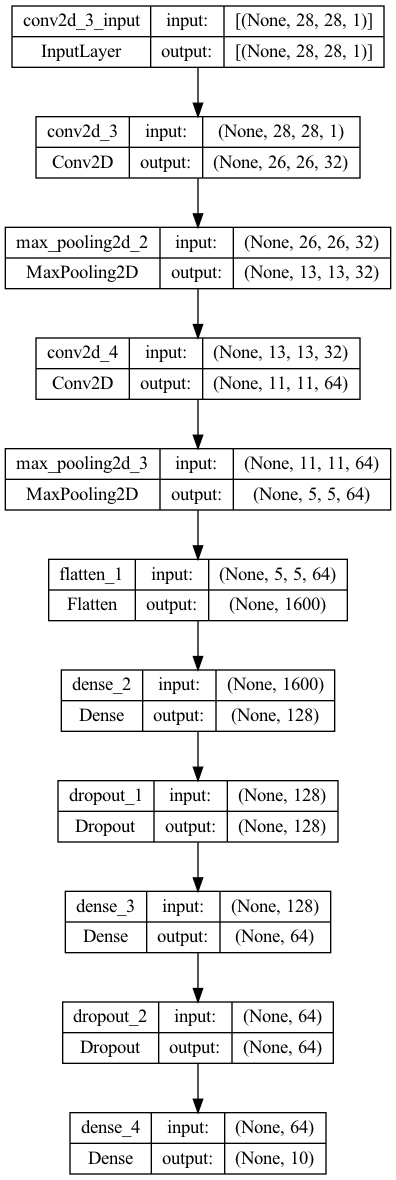

In [31]:
# show model architecture and create visual plot 
from tensorflow.keras.utils import plot_model

model.summary()
plot_model(model, show_shapes=True)

In [20]:
# Train model with set parameters
history = model.fit(x_train_augmented, y_train_augmented,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/10
329/329 - 18s - loss: 0.6021 - accuracy: 0.8052 - val_loss: 0.1913 - val_accuracy: 0.9401 - 18s/epoch - 56ms/step
Epoch 2/10
329/329 - 16s - loss: 0.2109 - accuracy: 0.9367 - val_loss: 0.1210 - val_accuracy: 0.9632 - 16s/epoch - 49ms/step
Epoch 3/10
329/329 - 19s - loss: 0.1510 - accuracy: 0.9555 - val_loss: 0.1090 - val_accuracy: 0.9648 - 19s/epoch - 57ms/step
Epoch 4/10
329/329 - 18s - loss: 0.1185 - accuracy: 0.9645 - val_loss: 0.0829 - val_accuracy: 0.9750 - 18s/epoch - 54ms/step
Epoch 5/10
329/329 - 17s - loss: 0.0989 - accuracy: 0.9700 - val_loss: 0.0758 - val_accuracy: 0.9789 - 17s/epoch - 52ms/step
Epoch 6/10
329/329 - 17s - loss: 0.0819 - accuracy: 0.9755 - val_loss: 0.0761 - val_accuracy: 0.9764 - 17s/epoch - 51ms/step
Epoch 7/10
329/329 - 16s - loss: 0.0725 - accuracy: 0.9779 - val_loss: 0.0619 - val_accuracy: 0.9827 - 16s/epoch - 49ms/step
Epoch 8/10
329/329 - 19s - loss: 0.0629 - accuracy: 0.9812 - val_loss: 0.0631 - val_accuracy: 0.9822 - 19s/epoch - 57ms/step


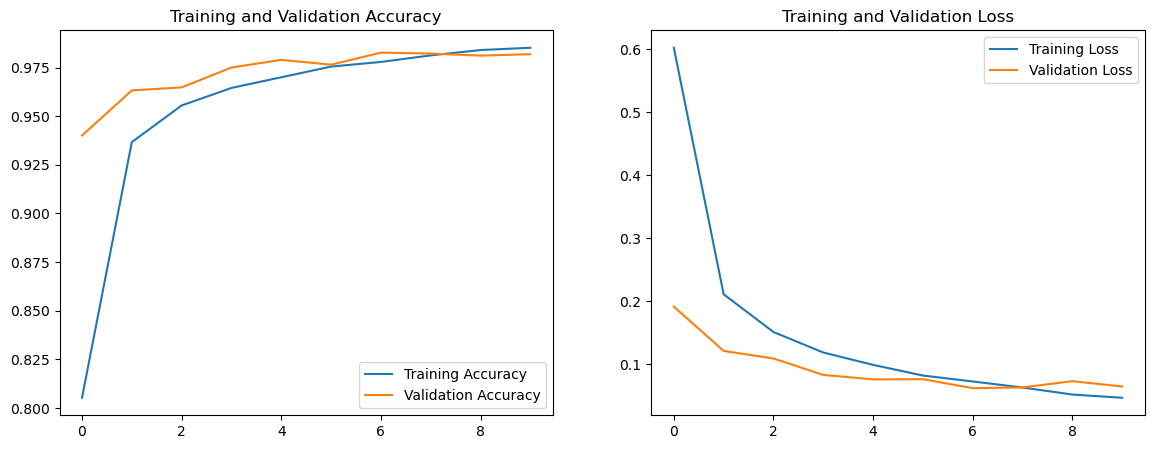

In [21]:
# visualize change in cost function during training 
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

In [23]:
# model loss and accuracy on validation set
model.evaluate(x_test, y_test, verbose=False)
# >99% accuracy, good

[0.03073165938258171, 0.9901000261306763]

In [24]:
# predicted values
y_pred_enc = model.predict(x_test)

# actual
y_act = [np.argmax(i) for i in y_test]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

313/313 [==============================] - 1s 4ms/step
[1.1857233e-10 3.3784060e-09 1.3783136e-05 3.0496466e-08 2.6798843e-09
 4.8418589e-11 7.3998452e-14 9.9998611e-01 7.2523065e-10 4.7983693e-09]
7


In [25]:
# print classification report
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



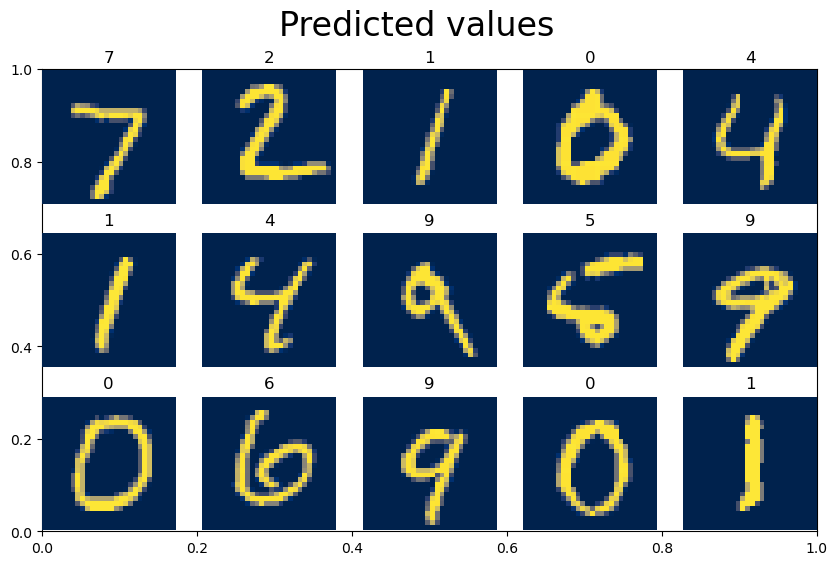

In [30]:
# predicted targets of each images
# (labels above the images are predicted labels)
fig, ax = plt.subplots(figsize=(10, 6))
for ind, row in enumerate(x_test[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')